Task - Assume that you are working as a Data Analyst Intern with Uber.
Your first assignment as an intern here is to perform analysis and ML modelling on rides data recorded between 2009-01-01 and 
2015-06-30.

Import Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load the Dataset

In [95]:
uber_rides_data = pd.read_csv('uber_rides_data.csv') 
uber_rides_data.head(10)

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


 Check the shape and structure of the data

In [96]:
print("Shape of the data:",uber_rides_data.shape)

Shape of the data: (200000, 8)


In [97]:
print("\nData types:\n", uber_rides_data.dtypes)


Data types:
 ride_id                int64
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


In [98]:
print("\nFirst few rows:\n", uber_rides_data.head())


First few rows:
     ride_id  fare_amount          pickup_datetime  pickup_longitude  \
0  24238194          7.5  2015-05-07 19:52:06 UTC        -73.999817   
1  27835199          7.7  2009-07-17 20:04:56 UTC        -73.994355   
2  44984355         12.9  2009-08-24 21:45:00 UTC        -74.005043   
3  25894730          5.3  2009-06-26 08:22:21 UTC        -73.976124   
4  17610152         16.0  2014-08-28 17:47:00 UTC        -73.925023   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.738354         -73.999512         40.723217                1  
1        40.728225         -73.994710         40.750325                1  
2        40.740770         -73.962565         40.772647                1  
3        40.790844         -73.965316         40.803349                3  
4        40.744085         -73.973082         40.761247                5  


Data Cleaning

In [99]:
print("\nMissing values:\n", uber_rides_data.isnull().sum())


Missing values:
 ride_id              0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


Drop rows with missing values

In [100]:
uber_rides_data.dropna(inplace=True)

 Drop duplicates

In [101]:
uber_rides_data.drop_duplicates(inplace=True)

Convert pickup_datetime to datetime format

In [102]:
uber_rides_data['pickup_datetime'] = pd.to_datetime(uber_rides_data['pickup_datetime'])

Check data again

In [103]:
print("\nData after cleaning:\n", uber_rides_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   ride_id            199999 non-null  int64              
 1   fare_amount        199999 non-null  float64            
 2   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 3   pickup_longitude   199999 non-null  float64            
 4   pickup_latitude    199999 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 13.7 MB

Data after cleaning:
 None


Summary statistics

In [104]:
print("\nSummary statistics:\n", uber_rides_data.describe())


Summary statistics:
             ride_id    fare_amount  pickup_longitude  pickup_latitude  \
count  1.999990e+05  199999.000000     199999.000000    199999.000000   
mean   2.771248e+07      11.359892        -72.527631        39.935881   
std    1.601386e+07       9.901760         11.437815         7.720558   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382534e+07       6.000000        -73.992065        40.734796   
50%    2.774524e+07       8.500000        -73.981823        40.752592   
75%    4.155535e+07      12.500000        -73.967154        40.767158   
max    5.542357e+07     499.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      199999.000000     199999.000000    199999.000000  
mean          -72.525292         39.923890         1.684543  
std            13.117408          6.794829         1.385995  
min         -3356.666300       -881.985513         0.000000  
25%       

Visualize fare distribution

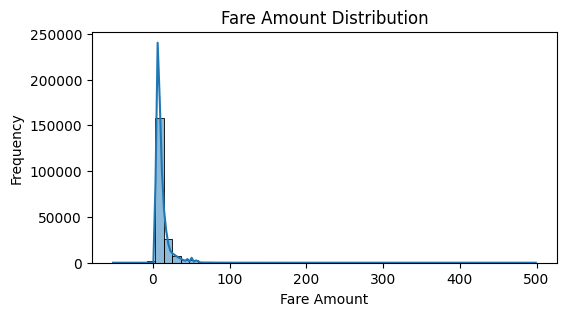

In [105]:
plt.figure(figsize=(6, 3))
sns.histplot(uber_rides_data['fare_amount'], bins=50, kde=True)
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

Extract features

In [106]:
uber_rides_data['day_of_week'] = uber_rides_data['pickup_datetime'].dt.day_name()

Visualize ride counts by day of the week

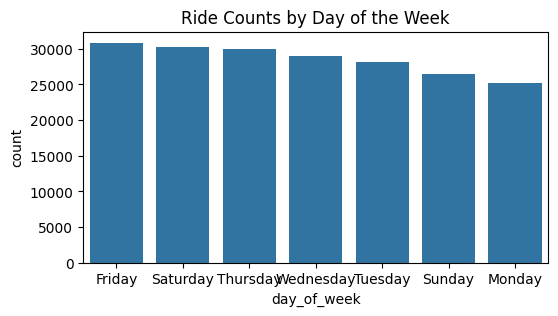

In [119]:
plt.figure(figsize=(6, 3))
sns.countplot(data=uber_rides_data, x='day_of_week', order=uber_rides_data['day_of_week'].value_counts().index)
plt.title('Ride Counts by Day of the Week')
plt.xticks(rotation=0)
plt.show()

Visualize ride counts by hour of the day

In [108]:
uber_rides_data['hour_of_day'] = uber_rides_data['pickup_datetime'].dt.hour

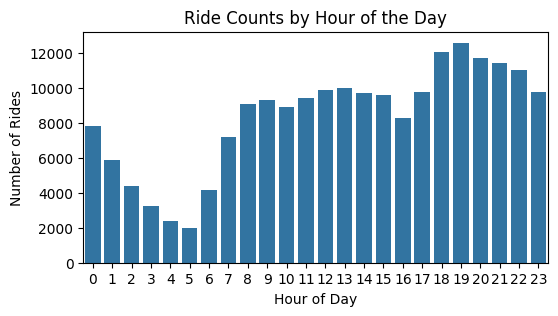

In [109]:
uber_rides_data['hour_of_day'] = uber_rides_data['pickup_datetime'].dt.hour
plt.figure(figsize=(6, 3))
sns.countplot(data=uber_rides_data, x='hour_of_day')
plt.title('Ride Counts by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()

Calculate distance using the Haversine formula

In [110]:
def haversine(row):
    from math import radians, sin, cos, sqrt, atan2
    R = 6371  # Earth radius in kilometers
    lon1, lat1, lon2, lat2 = map(radians, [row['pickup_longitude'], row['pickup_latitude'],
                                             row['dropoff_longitude'], row['dropoff_latitude']])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c  # returns distance in kilometers

 Apply the haversine function to each row

In [111]:
uber_rides_data['distance'] = uber_rides_data.apply(haversine, axis=1)

Define features and target variable

In [112]:
features = uber_rides_data[['distance', 'hour_of_day', 'passenger_count']]
target = uber_rides_data['fare_amount']

Split the data into train and test sets

In [113]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Using Random Forest Regressor as an example

In [114]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Predict on the test set

In [115]:
y_pred = rf_model.predict(X_test)

Calculate metrics

In [116]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [117]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error: 2.7909938817795186
Mean Squared Error: 39.11159604016808
R² Score: 0.6240134890484668


Visualize Predictions vs Actual

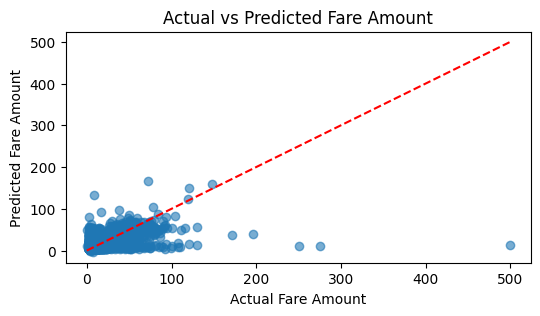

In [118]:
plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Actual vs Predicted Fare Amount')
plt.show()